In [ ]:
# Install AI Fairness 360 and dependencies
!pip install aif360
!pip install matplotlib seaborn
!pip install scikit-learn


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from aif360.datasets import AdultDataset

In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
dataset = AdultDataset()
print("Features:", dataset.feature_names)
print("Shape:", dataset.features.shape)

Features: ['age', 'education-num', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass=Federal-gov', 'workclass=Local-gov', 'workclass=Private', 'workclass=Self-emp-inc', 'workclass=Self-emp-not-inc', 'workclass=State-gov', 'workclass=Without-pay', 'education=10th', 'education=11th', 'education=12th', 'education=1st-4th', 'education=5th-6th', 'education=7th-8th', 'education=9th', 'education=Assoc-acdm', 'education=Assoc-voc', 'education=Bachelors', 'education=Doctorate', 'education=HS-grad', 'education=Masters', 'education=Preschool', 'education=Prof-school', 'education=Some-college', 'marital-status=Divorced', 'marital-status=Married-AF-spouse', 'marital-status=Married-civ-spouse', 'marital-status=Married-spouse-absent', 'marital-status=Never-married', 'marital-status=Separated', 'marital-status=Widowed', 'occupation=Adm-clerical', 'occupation=Armed-Forces', 'occupation=Craft-repair', 'occupation=Exec-managerial', 'occupation=Farming-fishing', 'occupation=Handl

In [ ]:
# Create the dataset directory inside AIF360 package
!mkdir -p /usr/local/lib/python3.12/dist-packages/aif360/data/raw/adult

# Download required files
!wget -O /usr/local/lib/python3.12/dist-packages/aif360/data/raw/adult/adult.data \
 https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

!wget -O /usr/local/lib/python3.12/dist-packages/aif360/data/raw/adult/adult.test \
 https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

!wget -O /usr/local/lib/python3.12/dist-packages/aif360/data/raw/adult/adult.names \
 https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names


--2025-09-06 17:56:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/usr/local/lib/python3.12/dist-packages/aif360/data/raw/adult/adult.data’

/usr/local/lib/pyth     [   <=>              ]   3.79M  7.48MB/s    in 0.5s    

2025-09-06 17:57:00 (7.48 MB/s) - ‘/usr/local/lib/python3.12/dist-packages/aif360/data/raw/adult/adult.data’ saved [3974305]

--2025-09-06 17:57:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/usr/local/lib/python3.12/dist-packages/

In [ ]:
from aif360.datasets import AdultDataset

dataset = AdultDataset()
print("Features:", dataset.feature_names)
print("Shape:", dataset.features.shape)

Features: ['age', 'education-num', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass=Federal-gov', 'workclass=Local-gov', 'workclass=Private', 'workclass=Self-emp-inc', 'workclass=Self-emp-not-inc', 'workclass=State-gov', 'workclass=Without-pay', 'education=10th', 'education=11th', 'education=12th', 'education=1st-4th', 'education=5th-6th', 'education=7th-8th', 'education=9th', 'education=Assoc-acdm', 'education=Assoc-voc', 'education=Bachelors', 'education=Doctorate', 'education=HS-grad', 'education=Masters', 'education=Preschool', 'education=Prof-school', 'education=Some-college', 'marital-status=Divorced', 'marital-status=Married-AF-spouse', 'marital-status=Married-civ-spouse', 'marital-status=Married-spouse-absent', 'marital-status=Never-married', 'marital-status=Separated', 'marital-status=Widowed', 'occupation=Adm-clerical', 'occupation=Armed-Forces', 'occupation=Craft-repair', 'occupation=Exec-managerial', 'occupation=Farming-fishing', 'occupation=Handl

In [ ]:
from aif360.datasets import AdultDataset

dataset = AdultDataset()
print("Features:", dataset.feature_names)
print("Shape:", dataset.features.shape)


Features: ['age', 'education-num', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass=Federal-gov', 'workclass=Local-gov', 'workclass=Private', 'workclass=Self-emp-inc', 'workclass=Self-emp-not-inc', 'workclass=State-gov', 'workclass=Without-pay', 'education=10th', 'education=11th', 'education=12th', 'education=1st-4th', 'education=5th-6th', 'education=7th-8th', 'education=9th', 'education=Assoc-acdm', 'education=Assoc-voc', 'education=Bachelors', 'education=Doctorate', 'education=HS-grad', 'education=Masters', 'education=Preschool', 'education=Prof-school', 'education=Some-college', 'marital-status=Divorced', 'marital-status=Married-AF-spouse', 'marital-status=Married-civ-spouse', 'marital-status=Married-spouse-absent', 'marital-status=Never-married', 'marital-status=Separated', 'marital-status=Widowed', 'occupation=Adm-clerical', 'occupation=Armed-Forces', 'occupation=Craft-repair', 'occupation=Exec-managerial', 'occupation=Farming-fishing', 'occupation=Handl

In [ ]:
# Split dataset (70% train, 30% test)
train, test = dataset.split([0.7], shuffle=True)

print("Train size:", len(train.features))
print("Test size:", len(test.features))


Train size: 31655
Test size: 13567


In [ ]:
# Check dataset bias
metric = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=[{'sex': 1}],      # Male
    unprivileged_groups=[{'sex': 0}]     # Female
)

print("Difference in mean outcomes (Male vs Female):", metric.mean_difference())
print("Disparate Impact (Female/Male):", metric.disparate_impact())


Difference in mean outcomes (Male vs Female): -0.198901432678815
Disparate Impact (Female/Male): 0.3634695423643793


In [ ]:
# Extract numpy arrays
X_train = train.features
y_train = train.labels.ravel()

X_test = test.features
y_test = test.labels.ravel()

# Train logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8468342301171962


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = LogisticRegression(max_iter=5000)


In [ ]:
# Wrap predictions back into AIF360 dataset
test_pred = test.copy()
test_pred.labels = y_pred.reshape(-1,1)

# Metrics
metric_pred = ClassificationMetric(
    test,
    test_pred,
    privileged_groups=[{'sex': 1}],   # Male
    unprivileged_groups=[{'sex': 0}]  # Female
)

print("Accuracy difference (Male vs Female):",
      metric_pred.accuracy(privileged=True) - metric_pred.accuracy(privileged=False))

print("Disparate Impact after prediction:", metric_pred.disparate_impact())


Accuracy difference (Male vs Female): -0.11626664528504382
Disparate Impact after prediction: 0.28425252848174304


In [ ]:
# Apply Reweighing (bias mitigation)
RW = Reweighing(
    unprivileged_groups=[{'sex': 0}],
    privileged_groups=[{'sex': 1}]
)

train_transf = RW.fit_transform(train)

# Train model again on reweighed data
X_train_rw = train_transf.features
y_train_rw = train_transf.labels.ravel()

model_rw = LogisticRegression(max_iter=5000, solver='saga')
model_rw.fit(X_train_rw, y_train_rw)

# Predict again
y_pred_rw = model_rw.predict(X_test)

# Evaluate fairness again
test_pred_rw = test.copy()
test_pred_rw.labels = y_pred_rw.reshape(-1,1)

metric_pred_rw = ClassificationMetric(
    test,
    test_pred_rw,
    privileged_groups=[{'sex': 1}],
    unprivileged_groups=[{'sex': 0}]
)

print("Accuracy (after reweighing):", accuracy_score(y_test, y_pred_rw))
print("Accuracy difference (Male vs Female):",
      metric_pred_rw.accuracy(privileged=True) - metric_pred_rw.accuracy(privileged=False))
print("Disparate Impact after reweighing:", metric_pred_rw.disparate_impact())


Accuracy (after reweighing): 0.7905948256799588
Accuracy difference (Male vs Female): -0.14432074901469782
Disparate Impact after reweighing: 0.5338626709116893


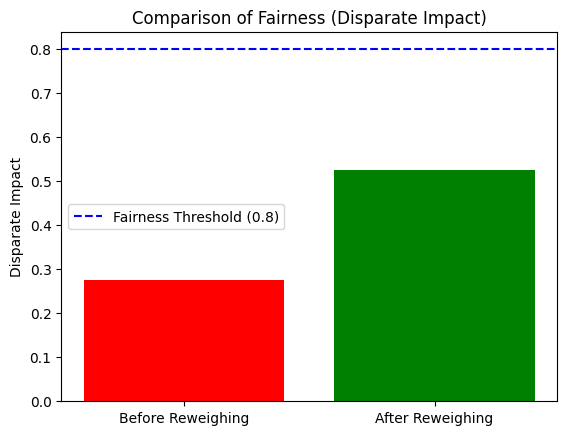

In [ ]:
import matplotlib.pyplot as plt

# Values
before_fairness = 0.276  # Disparate Impact before reweighing
after_fairness = 0.526   # Disparate Impact after reweighing

# Plot
plt.bar(["Before Reweighing", "After Reweighing"], [before_fairness, after_fairness], color=['red', 'green'])
plt.axhline(0.8, color='blue', linestyle='--', label='Fairness Threshold (0.8)')
plt.title("Comparison of Fairness (Disparate Impact)")
plt.ylabel("Disparate Impact")
plt.legend()
plt.show()
